In [ ]:
!pip install opencv-python

In [8]:
import cv2

capture = cv2.VideoCapture(0)

while(capture.isOpened()):
    ret,frame = capture.read()
    cv2.imshow("mi webcam", frame)
    if(cv2.waitKey(1)==ord('s')):
        break
capture.release()
cv2.destroyAllWindows

<function destroyAllWindows>

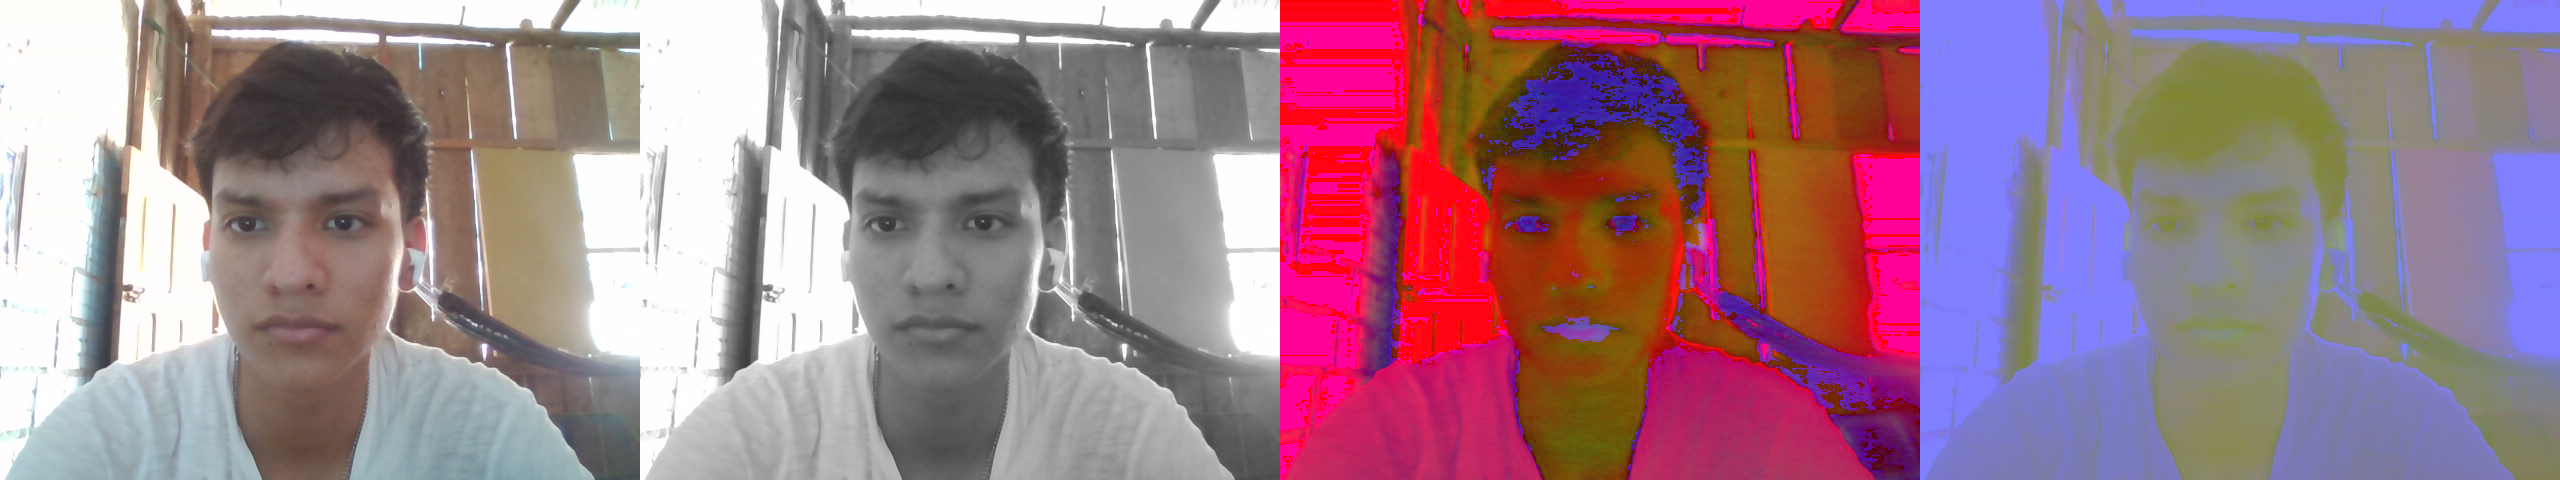


Captura interrumpida.
Cámara liberada.


In [17]:
import cv2
import numpy as np
from IPython.display import display, Image, clear_output
import time

# Usamos try...finally para garantizar que la cámara siempre se libere.
# Esto es una buena práctica y no se debe eliminar.
print("Iniciando... Para detener, presiona el botón 'Stop' (■) en Jupyter.")

cap = cv2.VideoCapture(0)

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # 1. Convertir a los diferentes espacios de color
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lab_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)

        # 2. Preparar para juntar las imágenes
        # La imagen en escala de grises necesita 3 canales para poderse "apilar" con las demás
        gray_display = cv2.cvtColor(gray_frame, cv2.COLOR_GRAY2BGR)

        # 3. Combinar y mostrar
        combined_frame = np.hstack([frame, gray_display, hsv_frame, lab_frame])
        
        _, buffer = cv2.imencode('.png', combined_frame)
        clear_output(wait=True)
        display(Image(data=buffer.tobytes()))
        
        time.sleep(0.01)

except KeyboardInterrupt:
    print("\nCaptura interrumpida.")
finally:
    # 4. Liberar la cámara (¡muy importante!)
    cap.release()
    print("Cámara liberada.")

In [32]:
#LE FALTA LA FUCIÓN DE FILTROS 

import cv2
import numpy as np

#creamos la función para cada filtro 
def filtro_original(frame): return frame 
def filtro_gussiano(frame): return cv2.GaussianBlur(frame,(21, 21),0)
def filtro_mediano(frame): return cv2.medianBlur(frame,11)
def filtro_bilateral(frame): return cv2.bilateralFilter(frame,9, 75, 75)
def filtro_dilatar(frame): return cv2.dilate(frame, kernel, iterations=1)
def filtro_erosionar(frame):return cv2.erode(frame, kernel, iterations=1)
def filtro_negativo(frame): return 255 - frame 

#funciones que se convertiran a grises 
def filtro_canny(frame):
    edges = cv2.Canny(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), 100, 200)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

def filtro_binario(frame):
    _, binary = cv2.threshold(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
    return cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

def filtro_equalizacion(frame):
    equalized = cv2.equalizeHist(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))
    return cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)

def filtro_combinado(frame):
    blurred = cv2.GaussianBlur(frame, (5, 5),0)
    edges = cv2.Canny(cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY), 50, 150)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

#definimos el karnel que las funciones necesitan
kernel = np.ones((5, 5), np.uint8)

#lista de las funciones
filtros = [
    filtro_original, filtro_gussiano, filtro_mediano, filtro_canny, filtro_bilateral,
    filtro_dilatar, filtro_erosionar, filtro_binario, filtro_equalizacion, filtro_negativo
]

#Creamos la lista de nombres para mostrar en pantalla

nombres_filtros = [
    "0: Original", "1: Filtro Gaussiano", "2: Filtro de Mediana", "3: Bordes Canny",
    "4: Filtro Bilateral", "5: Dilatacion", "6: Erosion", "7: Threshold Binario",
    "8: Equalizacion Hist.", "9: Negativo"
]

indice_filtro_activo = 0
cap = cv2.VideoCapture(0)
try:
    while True:
        ret, frame = cap.read()
        if not ret: break

        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'): break
        elif ord('0') <= key <= ord('9'):
            indice_filtro_activo = int(chr(key))
        elif key == ord('c'):
            indice_filtro_activo = -1 # para el conbinación de filtros 

        # Aplicar el filtro seleccionado
        if indice_filtro_activo == -1:
            frame_procesado = filtro_combinado(frame)
            texto_display = "C: Combinado (Desenfoque + Canny)"
        else:
            # Llama a la función correcta de tu lista 'filtros'
            frame_procesado = filtros[indice_filtro_activo](frame)
            texto_display = nombres_filtros[indice_filtro_activo]

        # Mostrar info y el resultado
        cv2.putText(frame_procesado, texto_display, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        cv2.imshow('Laboratorio de Filtros (q para salir)', frame_procesado)
finally:
    cap.release()
    cv2.destroyAllWindows()

In [4]:
#CON LA FUCIÓN DE FILTROS PERO CON AYUDA DE IA


import cv2
import numpy as np

# --- 1. Funciones de Filtros (sin cambios) ---
def filtro_original(frame): return frame
def filtro_gaussiano(frame): return cv2.GaussianBlur(frame, (21, 21), 0)
def filtro_mediano(frame): return cv2.medianBlur(frame, 11)
def filtro_bilateral(frame): return cv2.bilateralFilter(frame, 9, 75, 75)
def filtro_dilatar(frame): return cv2.dilate(frame, kernel, iterations=1)
def filtro_erosionar(frame): return cv2.erode(frame, kernel, iterations=1)
def filtro_negativo(frame): return 255 - frame

def filtro_canny(frame):
    if len(frame.shape) > 2: # Si la imagen es a color
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(frame, 100, 200)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

def filtro_binario(frame):
    if len(frame.shape) > 2:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(frame, 127, 255, cv2.THRESH_BINARY)
    return cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

def filtro_equalizacion(frame):
    if len(frame.shape) > 2:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(frame)
    return cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)


# --- 2. Preparación de Listas y Variables de Estado ---
kernel = np.ones((5, 5), np.uint8)
filtros = [
    filtro_original, filtro_gaussiano, filtro_mediano, filtro_canny, filtro_bilateral,
    filtro_dilatar, filtro_erosionar, filtro_binario, filtro_equalizacion, filtro_negativo
]
nombres_filtros = [
    "Original", "Gaussiano", "Mediana", "Canny", "Bilateral",
    "Dilatacion", "Erosion", "Binario", "Equalizacion", "Negativo"
]

# --- NUEVAS VARIABLES DE ESTADO ---
indice_filtro_unico = 0      # Para el modo de un solo filtro
en_modo_combinado = False      # Booleano para saber si estamos en modo combinado
filtros_combinados_activos = set() # Un 'set' para guardar los filtros activos (evita duplicados)


# --- 3. Bucle Principal con Lógica de Modos ---
cap = cv2.VideoCapture(0)
try:
    while True:
        ret, frame = cap.read()
        if not ret: break

        key = cv2.waitKey(1) & 0xFF

        # --- LÓGICA DE CONTROL ---
        if key == ord('q'):
            break
        elif key == ord('c'):
            en_modo_combinado = not en_modo_combinado # Alterna el modo combinado (ON/OFF)
            if not en_modo_combinado:
                filtros_combinados_activos.clear() # Limpia la combinación al salir del modo
        elif ord('0') <= key <= ord('9'):
            indice_presionado = int(chr(key))
            
            if en_modo_combinado:
                # Si estamos en modo combinado, añadimos o quitamos el filtro
                if indice_presionado in filtros_combinados_activos:
                    filtros_combinados_activos.remove(indice_presionado)
                else:
                    # No se puede añadir el filtro 0 (Original) a una combinación
                    if indice_presionado > 0:
                         filtros_combinados_activos.add(indice_presionado)
            else:
                # Si no, simplemente seleccionamos un único filtro
                indice_filtro_unico = indice_presionado
        
        # --- LÓGICA DE APLICACIÓN DE FILTROS ---
        frame_procesado = frame.copy()
        
        if en_modo_combinado:
            # Si hay filtros activos en la combinación, los aplicamos en orden
            if filtros_combinados_activos:
                # Ordenamos los índices para aplicar los filtros siempre en la misma secuencia
                indices_ordenados = sorted(list(filtros_combinados_activos))
                for indice in indices_ordenados:
                    frame_procesado = filtros[indice](frame_procesado)
                
                # Construir el texto para mostrar los filtros activos
                nombres_activos = [nombres_filtros[i] for i in indices_ordenados]
                texto_display = "Combo: " + " + ".join(nombres_activos)
            else:
                # Estamos en modo combinado, pero no hemos seleccionado ningún filtro aún
                texto_display = "Modo Combinado: Selecciona 1-9"
        else:
            # Modo de un solo filtro
            frame_procesado = filtros[indice_filtro_unico](frame_procesado)
            texto_display = f"{indice_filtro_unico}: {nombres_filtros[indice_filtro_unico]}"

        # --- Mostrar Info y Resultado ---
        cv2.putText(frame_procesado, texto_display, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        info_text = "'C' para Modo Combo | 'Q' para Salir"
        cv2.putText(frame_procesado, info_text, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        cv2.imshow('Laboratorio de Filtros Avanzado', frame_procesado)
finally:
    cap.release()
    cv2.destroyAllWindows()

In [29]:
x = frame

print(x.shape)
print(x[50].shape)
print(x[40:50].shape)


print(x[:,:,0].shape)
print(x[:,:,1].shape)
print(x[:,:,2].shape)



(480, 640, 3)
(640, 3)
(10, 640, 3)
(480, 640)
(480, 640)
(480, 640)


In [30]:
import cv2
import numpy as np

def filtro_original(frame):
    return frame

def filtro_azul(frame):
    zeros = np.zeros_like(frame[:, :, 0])
    b, _, _ = cv2.split(frame)
    return cv2.merge([b, zeros, zeros])

def filtro_verde(frame):
    zeros = np.zeros_like(frame[:, :, 0])
    _, g, _ = cv2.split(frame)
    return cv2.merge([zeros, g, zeros])

def filtro_rojo(frame):
    zeros = np.zeros_like(frame[:, :, 0])
    _, _, r = cv2.split(frame)
    return cv2.merge([zeros, zeros, r])

filtros = [
    filtro_original, 
    filtro_azul,     
    filtro_verde,    
    filtro_rojo      
]

nombres_filtros = [
    "Original",
    "Azul",
    "Verde",
    "Rojo"
]

modo_combinado = False
filtros_combinados_activos = set()
indice_filtro_unico = 0


cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret: break

        Key = cv2.waitKey(1) & 0xFF

        if Key == ord('q'):
            break
        elif Key == ord ('c'):
            modo_combinado = not modo_combinado
            filtros_combinados_activos.clear()

        elif ord('0') <= Key <= ord('3'):
            indice_presionado = int(chr(Key))

            if modo_combinado:
                if indice_presionado in filtros_combinados_activos:
                    filtros_combinados_activos.remove(indice_presionado)
                else:
                    filtros_combinados_activos.add(indice_presionado)
            else:
                indice_filtro_unico = indice_presionado

                
        texto_display = ""

        if modo_combinado:

            if not filtros_combinados_activos:
                frame_procesado = np.zeros_like(frame)
                texto_display = "Modo combo: Selecciona 1-3"
            else:
                b_orig, g_orig, r_orig = cv2.split(frame)
                zeros = np.zeros_like(b_orig)

                canal_b = b_orig if 1 in filtros_combinados_activos else zeros
                canal_g = g_orig if 2 in filtros_combinados_activos else zeros
                canal_r = r_orig if 3 in filtros_combinados_activos else zeros

                frame_procesado = cv2.merge([canal_b, canal_g, canal_r])

                nombres_activos = sorted([nombres_filtros[i] for i in filtros_combinados_activos])
                texto_display = "Combo: " + " + ".join(nombres_activos)
        else:
            frame_procesado = filtros[indice_filtro_activo](frame)
            texto_display = f"Modo Unico:{nombres_filtros[indice_filtro_unico]}"

        cv2.putText(frame_procesado, texto_display, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8,(0, 255, 255), 2)
        info_text = "'C': Cambiar Modo | '0-3':Filtros 'Q':Salir"
        cv2.putText(frame_procesado, info_text, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
        cv2.imshow("Filtros de Color", frame_procesado)

finally:
    cap.release()
    cv2.destroyAllWindows()

In [27]:
import cv2
import numpy as np

# --- 1. Funciones de Filtros (sin cambios) ---
# Estas funciones son perfectas como están.
def filtro_original(frame):
    return frame

def filtro_azul(frame):
    zeros = np.zeros_like(frame[:, :, 0])
    b, _, _ = cv2.split(frame)
    return cv2.merge([b, zeros, zeros])

def filtro_verde(frame):
    zeros = np.zeros_like(frame[:, :, 0])
    _, g, _ = cv2.split(frame)
    return cv2.merge([zeros, g, zeros])

def filtro_rojo(frame):
    zeros = np.zeros_like(frame[:, :, 0])
    _, _, r = cv2.split(frame)
    return cv2.merge([zeros, zeros, r])

# --- 2. Preparación de Listas y Variables de Estado ---
filtros = [
    filtro_original, # Índice 0
    filtro_azul,     # Índice 1
    filtro_verde,    # Índice 2
    filtro_rojo      # Índice 3
]
nombres_filtros = [
    "Original",
    "Azul",
    "Verde",
    "Rojo"
]

# --- NUEVAS VARIABLES DE ESTADO ---
en_modo_combinado = False                  # Para saber si estamos en modo combinado
filtros_combinados_activos = set()         # Un 'set' para guardar los filtros activos (evita duplicados)
indice_filtro_unico = 0                    # MODIFICADO: Renombrado para más claridad

# --- 3. Bucle Principal ---
cap = cv2.VideoCapture(0)
try:
    while True:
        ret, frame = cap.read()
        if not ret: break

        key = cv2.waitKey(1) & 0xFF

        # --- LÓGICA DE CONTROL (MODIFICADA) ---
        if key == ord('q'):
            break
        elif key == ord('c'): # NUEVO: Tecla para cambiar de modo
            en_modo_combinado = not en_modo_combinado # Alterna entre True y False
            filtros_combinados_activos.clear() # Limpia la combinación al cambiar de modo
        
        # Lógica para las teclas numéricas
        elif ord('0') <= key <= ord('3'):
            indice_presionado = int(chr(key))
            
            if en_modo_combinado:
                # Si estamos en modo combinado, añadimos o quitamos el filtro
                # No se puede añadir el filtro 0 (Original) a una combinación
                if indice_presionado > 0:
                    if indice_presionado in filtros_combinados_activos:
                        filtros_combinados_activos.remove(indice_presionado)
                    else:
                        filtros_combinados_activos.add(indice_presionado)
            else:
                # Si no, simplemente seleccionamos un único filtro
                indice_filtro_unico = indice_presionado
        
        # --- LÓGICA DE APLICACIÓN DE FILTROS (MODIFICADA) ---
        
        texto_display = ""
        
        if en_modo_combinado:
            # Lógica para el modo combinado
            if not filtros_combinados_activos:
                # Si no hay filtros activos, muestra un lienzo negro
                frame_procesado = np.zeros_like(frame)
                texto_display = "Modo Combo: Selecciona 1-3"
            else:
                # Combina los canales activos
                b_orig, g_orig, r_orig = cv2.split(frame)
                zeros = np.zeros_like(b_orig)
                
                # Revisa qué canales están activos y los usa. Si no, usa el canal negro.
                canal_b = b_orig if 1 in filtros_combinados_activos else zeros
                canal_g = g_orig if 2 in filtros_combinados_activos else zeros
                canal_r = r_orig if 3 in filtros_combinados_activos else zeros
                
                frame_procesado = cv2.merge([canal_b, canal_g, canal_r])
                
                # Construye el texto para mostrar los filtros activos
                nombres_activos = sorted([nombres_filtros[i] for i in filtros_combinados_activos])
                texto_display = "Combo: " + " + ".join(nombres_activos)
        else:
            # Lógica para el modo de un solo filtro (como antes)
            frame_procesado = filtros[indice_filtro_unico](frame)
            texto_display = f"Modo Unico: {nombres_filtros[indice_filtro_unico]}"

        # --- Mostrar Info y Resultado ---
        cv2.putText(frame_procesado, texto_display, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)
        info_text = "'C':Cambiar Modo | '0-3':Filtros | 'Q':Salir"
        cv2.putText(frame_procesado, info_text, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
        cv2.imshow("Filtros de Color", frame_procesado)

finally:
    cap.release()
    cv2.destroyAllWindows()

In [31]:
import cv2
import numpy as np

# --- 1. Funciones de Filtros (con la nueva lógica de combinación) ---

# Cada función ahora toma doqs argumentos:
# 1. frame_acumulado: El resultado de los filtros anteriores (empieza como un lienzo negro).
# 2. frame_original: La imagen original de la cámara para extraer el canal de color.

def filtro_canal_azul(frame_acumulado, frame_original):
    """Extrae el canal azul del frame original y lo añade al acumulado."""
    b_orig, _, _ = cv2.split(framqe_original)
    _, g_acum, r_acum = cv2.split(frame_acumulado)
    # Combina el canal azul original con los canales verde y rojo que ya estaban en el acumulado.
    return cv2.merge([b_orig, g_acum, r_acum])

def filtro_canal_verde(frame_acumulado, frame_original):
    """Extrae el canal verde del frame original y lo añade al acumulado."""
    _, g_orig, _ = cv2.split(frame_original)
    b_acum, _, r_acum = cv2.split(frame_acumulado)
    # Combina el canal verde original con los canales azul y rojo que ya estaban en el acumulado.
    return cv2.merge([b_acum, g_orig, r_acum])

def filtro_canal_rojo(frame_acumulado, frame_original):
    """Extrae el canal rojo del frame original y lo añade al acumulado."""
    _, _, r_orig = cv2.split(frame_original)
    b_acum, g_acum, _ = cv2.split(frame_acumulado)
    # Combina el canal rojo original con los canales azul y verde que ya estaban en el acumulado.
    return cv2.merge([b_acum, g_acum, r_orig])


# --- 2. Preparación de Listas y Variables de Estado ---

# Lista de las funciones de filtro que hemos creado
filtros = [
    filtro_canal_azul, 
    filtro_canal_verde, 
    filtro_canal_rojo
]

# Nombres correspondientes para mostrar en pantalla
nombres_filtros = [
    "Azul", 
    "Verde", 
    "Rojo"
]

# Usamos un 'set' para guardar los índices de los filtros activos (0 para Azul, 1 para Verde, 2 para Rojo)
filtros_combinados_activos = set()


# --- 3. Bucle Principal ---
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: No se pudo abrir la cámara.")
    exit()

try:
    while True:
        ret, frame = cap.read()
        if not ret: break

        # --- LÓGICA DE CONTROL ---
        key = cv2.waitKey(1) & 0xFF

        if key == ord('q'):
            break
        # Mapeamos las teclas '1', '2', '3' a los índices de filtro 0, 1, 2
        elif key in [ord('1'), ord('2'), ord('3')]:
            # Convertimos la tecla presionada a su índice correspondiente (ord('1') -> 49, -49 = 0)
            indice_presionado = key - ord('1') 
            
            # Lógica de "toggle": si el filtro ya está activo, lo quitamos. Si no, lo añadimos.
            if indice_presionado in filtros_combinados_activos:
                filtros_combinados_activos.remove(indice_presionado)
            else:
                filtros_combinados_activos.add(indice_presionado)

        # --- LÓGICA DE APLICACIÓN DE FILTROS ---
        
        # Creamos un "lienzo" negro del mismo tamaño que el frame.
        # Este será nuestro 'frame_acumulado' inicial.
        lienzo_negro = np.zeros_like(frame)
        frame_procesado = lienzo_negro

        # Ordenamos los índices para aplicar los filtros siempre en la misma secuencia (B->G->R)
        indices_ordenados = sorted(list(filtros_combinados_activos))

        # Si hay filtros activos, los aplicamos en secuencia
        if indices_ordenados:
            for indice in indices_ordenados:
                # ¡Aquí está la magia!
                # La función de filtro toma el resultado anterior (frame_procesado) y el frame original
                # para construir el nuevo resultado.
                frame_procesado = filtros[indice](frame_procesado, frame)
            
            # Construir el texto para mostrar los filtros activos
            nombres_activos = [nombres_filtros[i] for i in indices_ordenados]
            texto_display = "Activos: " + " + ".join(nombres_activos)
        else:
            # Si no hay filtros activos, el frame procesado sigue siendo el lienzo negro.
            texto_display = "Filtros Apagados"


        # --- Mostrar Info y Resultado ---
        cv2.putText(frame_procesado, texto_display, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)
        info_text = "1:Azul | 2:Verde | 3:Rojo | Q:Salir"
        cv2.putText(frame_procesado, info_text, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
        cv2.imshow('Combinador de Filtros RGB (Estilo Funcional)', frame_procesado)
finally:
    cap.release()
    cv2.destroyAllWindows()

In [32]:
#TAREA 4 Análisis de histogramas en vivo 

import cv2
import numpy as np

# --- Configuración Inicial ---
# Estas son constantes que podemos ajustar fácilmente.
# Un buen hábito es tenerlas arriba para no tener que "cazar" números mágicos en el código.
CAM_INDEX = 0          # Índice de la cámara. 0 suele ser la webcam integrada.
HIST_WIDTH = 512       # Ancho de la ventana del histograma
HIST_HEIGHT = 400      # Alto de la ventana del histograma
NUM_BINS = 256         # Número de "contenedores" o niveles de intensidad (0-255)

# --- Inicialización ---
# Capturamos el video. Usamos un bloque try-except para manejar el caso
# en que la cámara no esté disponible. Un código robusto anticipa fallos.
try:
    cap = cv2.VideoCapture(CAM_INDEX)
    if not cap.isOpened():
        raise IOError("No se puede abrir la cámara. Verifica el índice o la conexión.")
except Exception as e:
    print(f"Error al inicializar la cámara: {e}")
    exit()

print("Cámara iniciada. Presiona 'q' en la ventana de video para salir.")

# --- Bucle Principal (Procesamiento en Tiempo Real) ---
while True:
    # 1. Captura de un frame
    ret, frame = cap.read()
    if not ret:
        print("No se pudo recibir el frame. Saliendo...")
        break

    # 2. Conversión a escala de grises
    # Es más eficiente y claro para analizar la luminosidad.
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 3. Cálculo del Histograma
    # cv2.calcHist([imagen], [canal], mascara, [tamaño_hist], [rango])
    hist = cv2.calcHist([gray_frame], [0], None, [NUM_BINS], [0, NUM_BINS])

    # 4. Creación de la imagen para visualizar el histograma
    # Creamos un lienzo negro (array de ceros con numpy)
    hist_image = np.zeros((HIST_HEIGHT, HIST_WIDTH, 3), dtype=np.uint8)

    # 5. Normalización y dibujado del histograma
    # Normalizamos el histograma para que el valor máximo coincida con la altura de la imagen.
    # Esto asegura que el histograma siempre se vea completo, sin importar los picos.
    cv2.normalize(hist, hist, 0, HIST_HEIGHT, cv2.NORM_MINMAX)

    bin_width = int(round(HIST_WIDTH / NUM_BINS))

    for i in range(NUM_BINS):
        # Dibujamos una línea vertical para cada bin del histograma
        cv2.line(hist_image,
                 (bin_width * i, HIST_HEIGHT),
                 (bin_width * i, HIST_HEIGHT - int(hist[i])),
                 (255, 255, 255), # Color blanco
                 thickness=2)

    # 6. Mostrar los resultados en ventanas
    cv2.imshow('Video en Vivo', frame)
    cv2.imshow('Histograma en Tiempo Real', hist_image)

    # 7. Control de salida
    # Esperamos 1ms por una tecla. Si es 'q', rompemos el bucle.
    # El 0xFF es una máscara para asegurar la compatibilidad entre sistemas de 32 y 64 bits.
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# --- Limpieza de Recursos ---
# Es fundamental liberar la cámara y cerrar todas las ventanas al terminar.
print("Cerrando aplicación...")
cap.release()
cv2.destroyAllWindows()

Cámara iniciada. Presiona 'q' en la ventana de video para salir.


C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_33180\1840705633.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  (bin_width * i, HIST_HEIGHT - int(hist[i])),


Cerrando aplicación...


In [35]:
# Paso 1: Importar las herramientas que necesitamos
import cv2
import time # <<< NUEVO: Importamos la biblioteca para manejar el tiempo (nuestro cronómetro)

# --- INICIO DE LA CONFIGURACIÓN ---

# <<< NUEVO: Definimos los FPS que queremos como objetivo.
# ¡Puedes cambiar este número para experimentar!
# Un número alto (ej. 30) = fluido. Un número bajo (ej. 5) = entrecortado.
TARGET_FPS = 15
tiempo_por_frame = 1 / TARGET_FPS # Calculamos cuánto debe durar cada frame en segundos

captura = cv2.VideoCapture(0)
frame_referencia = None

# --- FIN DE LA CONFIGURACIÓN ---

while True:
    # <<< NUEVO: El "chef" mira su cronómetro al inicio del trabajo.
    tiempo_inicio_frame = time.time()

    leido, frame_actual = captura.read()
    if not leido:
        break

    gris = cv2.cvtColor(frame_actual, cv2.COLOR_BGR2GRAY)
    gris = cv2.GaussianBlur(src=gris, ksize=(3, 3), sigmaX=0)

    if frame_referencia is None:
        frame_referencia = gris
        continue

    diferencia = cv2.absdiff(frame_referencia, gris)
    umbral = cv2.threshold(src=diferencia, thresh=30, maxval=255, type=cv2.THRESH_BINARY)[1]
    umbral = cv2.dilate(src=umbral, kernel=None, iterations=2)
    contornos, _ = cv2.findContours(image=umbral, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

    for contorno in contornos:
        if cv2.contourArea(contorno) < 500:
            continue
        
        (x, y, w, h) = cv2.boundingRect(contorno)
        cv2.rectangle(img=frame_actual, pt1=(x, y), pt2=(x + w, y + h), color=(0, 255, 0), thickness=2)


    # --- INICIO DEL CONTROL DE FPS ---

    # <<< NUEVO: El "chef" mira de nuevo su cronómetro al final del trabajo.
    tiempo_fin_frame = time.time()
    
    # Calculamos cuánto tiempo nos tomó procesar este fotograma.
    tiempo_procesamiento = tiempo_fin_frame - tiempo_inicio_frame
    
    # Calculamos cuánto tiempo debemos "descansar".
    tiempo_espera = tiempo_por_frame - tiempo_procesamiento

    # Si terminamos antes de tiempo (tiempo_espera > 0), tomamos un descanso.
    if tiempo_espera > 0:
        time.sleep(tiempo_espera)

    # <<< NUEVO (Opcional pero útil): Calculamos los FPS reales y los mostramos en pantalla.
    fps_reales = 1 / (time.time() - tiempo_inicio_frame)
    cv2.putText(img=frame_actual, 
                text=f"FPS: {int(fps_reales)}", 
                org=(10, 30), 
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale=1, 
                color=(255, 255, 255), 
                thickness=2)
    
    # --- FIN DEL CONTROL DE FPS ---

    cv2.imshow("Cámara en Vivo (con detección)", frame_actual)
    cv2.imshow("Umbral (lo que se mueve)", umbral)

    if cv2.waitKey(1) == ord('q'):
        break

# --- LIMPIEZA FINAL ---
captura.release()
cv2.destroyAllWindows()
print("Programa finalizado.")

Programa finalizado.


In [1]:
#ejercicio 6: Seguimiento de Objetos por Color

import cv2
import numpy as np

# =======================================================================
# == PASO 1: EL CATÁLOGO DE LA FÁBRICA (Libro de Recetas de Colores) ==
# =======================================================================
# Aquí definimos TODOS los colores que queremos detectar en un solo lugar.
# Si quieres añadir un color nuevo, solo tienes que añadir una entrada aquí.

colores_a_detectar = {
    "rojo": {
        # El rojo necesita una lista con DOS rangos por el círculo HSV
        "rangos": [
            [np.array([0, 100, 20]), np.array([8, 255, 255])],
            [np.array([175, 100, 20]), np.array([179, 255, 255])]
        ],
        "color_rectangulo": (0, 0, 255) # Color del rectángulo en BGR (Rojo)
    },
    "azul": {
        # El azul solo necesita un rango
        "rangos": [
            [np.array([100, 100, 20]), np.array([125, 255, 255])]
        ],
        "color_rectangulo": (255, 0, 0) # Color del rectángulo en BGR (Azul)
    },
    "verde": {
        # El verde también necesita solo un rango
        "rangos": [
            [np.array([35, 100, 50]), np.array([85, 255, 255])]
        ],
        "color_rectangulo": (0, 255, 0) # Color del rectángulo en BGR (Verde)
    }
    # ¡Puedes añadir "amarillo", "morado", etc. aquí mismo!
}

# =============================================================================
# == PASO 2: LA LÍNEA DE ENSAMBLAJE (Nuestra Máquina Universal) ==
# =============================================================================
# Esta función es nuestro trabajador experto. Sabe cómo detectar UN color,
# sea cual sea. Le damos el fotograma y las especificaciones del color,
# y ella hace todo el trabajo.

def detectar_y_dibujar_color(frame, frame_hsv, especificaciones_color):
    
    # Creamos una máscara inicial vacía (toda negra)
    mascara_combinada = None

    # Recorremos la lista de rangos para este color.
    # Para el azul, este bucle solo se ejecutará una vez. Para el rojo, dos veces.
    for rango in especificaciones_color['rangos']:
        rango_bajo = rango[0]
        rango_alto = rango[1]
        
        # Creamos una máscara para el rango actual
        mascara_actual = cv2.inRange(frame_hsv, rango_bajo, rango_alto)
        
        # Si es la primera máscara, la guardamos. Si no, la sumamos a la anterior.
        if mascara_combinada is None:
            mascara_combinada = mascara_actual
        else:
            mascara_combinada = cv2.add(mascara_combinada, mascara_actual)

    # Limpiamos la máscara final
    mascara_limpia = cv2.erode(mascara_combinada, None, iterations=2)
    mascara_limpia = cv2.dilate(mascara_limpia, None, iterations=2)

    # Buscamos los contornos
    contornos, _ = cv2.findContours(mascara_limpia, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujamos los rectángulos
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        if area > 700:
            (x, y, w, h) = cv2.boundingRect(contorno)
            # Usamos el color del rectángulo definido en nuestro catálogo
            color_caja = especificaciones_color['color_rectangulo']
            cv2.rectangle(frame, (x, y), (x + w, y + h), color_caja, 3)

# =======================================================================
# == PASO 3: EL GERENTE DE LA FÁBRICA (El Bucle Principal Limpio) ==
# =======================================================================

captura = cv2.VideoCapture(0)

while True:
    leido, frame = captura.read()
    if not leido:
        break

    # Convertimos a HSV una sola vez al principio
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Le decimos a nuestra fábrica que procese TODOS los colores del catálogo
    for nombre_color, especificaciones in colores_a_detectar.items():
        # Llamamos a nuestra máquina universal para cada color
        detectar_y_dibujar_color(frame, frame_hsv, especificaciones)

    # Mostramos el resultado final con todos los rectángulos dibujados
    cv2.imshow("Fábrica de Detección de Colores", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

captura.release()
cv2.destroyAllWindows()

In [3]:
#Tarea 7 detector de esquinas y puntos clave

import cv2
import numpy as np

BLOCK_SIZE = 2

K_SIZE = 3

K_PARAM = 0.04

# =======================================================================
# == EMPIEZA EL ANÁLISIS DE LA IMAGEN EN TIEMPO REAL ==
# =======================================================================

captura = cv2.VideoCapture(0)

while True:
    leido, frame = captura.read()
    if not leido:
        break

    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    gris = np.float32(gris)

    dst = cv2.cornerHarris(src=gris, 
                             blockSize=BLOCK_SIZE, 
                             ksize=K_SIZE, 
                             k=K_PARAM)

    umbral = 0.01 * dst.max()
    
    frame[dst > umbral] = [0, 0, 255] # El color es BGR, así que [Azul, Verde, Rojo]

    # Mostramos el resultado en pantalla
    cv2.imshow("Detector de Puntos Clave (Esquinas)", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

captura.release()
cv2.destroyAllWindows()

In [24]:
#tarea 8: Detección de Contornos Avanzada

import cv2

# =======================================================================
# == PASO 1: CONFIGURAR EL EQUIPO DEL BIÓLOGO ==
# =======================================================================
AREA_MINIMA = 500
AREA_MAXIMA = 30000

# =======================================================================
# == PASO 2: EMPIEZA LA EXPEDICIÓN EN TIEMPO REAL ==
# =======================================================================

captura = cv2.VideoCapture(0)

while True:
    leido, frame = captura.read()
    
    # --- ARREGLO 1: HACER AL BIÓLOGO MÁS PACIENTE ---
    # Si un frame falla, no abortamos, simplemente saltamos a la siguiente vuelta.
    if not leido:
        continue

    # --- Usar el filtro para obtener una vista clara de las siluetas ---
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gris_suavizado = cv2.GaussianBlur(gris, (5, 5), 0)
    
    # --- ARREGLO 2: CALIBRAR LA SENSIBILIDAD DEL ESCÁNER ---
    # Aumentamos el valor de 45 a 100 para ser menos sensible a la luz.
    _, umbral = cv2.threshold(gris_suavizado, 100, 255, cv2.THRESH_BINARY)
    
    umbral = cv2.dilate(umbral, None, iterations=2)

    # --- Activar el "Escáner de Siluetas" ---
    contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # --- Empezar el proceso de clasificación y documentación ---
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        
        if area < AREA_MINIMA or area > AREA_MAXIMA:
            continue

        (x, y, w, h) = cv2.boundingRect(contorno)
        perimetro = cv2.arcLength(contorno, True)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        texto_area = f"Area: {int(area)}"
        texto_perimetro = f"Perimetro: {int(perimetro)}"
        
        cv2.putText(frame, texto_area, (x + 10, y + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        cv2.putText(frame, texto_perimetro, (x + 10, y + 60), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    cv2.imshow("Monitor del Biólogo", frame)
    cv2.imshow("Vista del Escaner (Umbral)", umbral)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

captura.release()
cv2.destroyAllWindows()

In [3]:
#detector de gestos de las manos


# Importamos las librerías necesarias
import cv2
import numpy as np
import math

# --- 1. Configuración Inicial ---

# Inicializamos la captura de video desde la cámara web (usualmente el índice 0)
cap = cv2.VideoCapture(0)

# Verificamos si la cámara se abrió correctamente
if not cap.isOpened():
    print("Error: No se pudo abrir la cámara.")
    exit()

print("Cámara iniciada. Presiona 'q' para salir.")

while True:
    try:
        # --- 2. Captura y Pre-procesamiento del Fotograma ---

        # Leemos un fotograma de la cámara
        ret, frame = cap.read()
        if not ret:
            print("No se pudo recibir el fotograma. Saliendo...")
            break

        # Espejamos el fotograma horizontalmente para que sea como un espejo (más intuitivo)
        frame = cv2.flip(frame, 1)

        # Definimos una Región de Interés (ROI) para enfocarnos solo en el área de la mano
        # Esto evita que otros objetos con color de piel en el fondo interfieran
        roi = frame[100:400, 100:400]
        cv2.rectangle(frame, (100, 100), (400, 400), (0, 255, 0), 2) # Dibuja el cuadro de la ROI

        # --- 3. Segmentación por Color de Piel ---

        # Convertimos la ROI al espacio de color HSV (Hue, Saturation, Value)
        # HSV es mejor para la detección de color bajo diferentes condiciones de iluminación
        hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

        # Definimos el rango de color de piel en HSV
        # ESTE RANGO ES EL PARÁMETRO MÁS IMPORTANTE A AJUSTAR
        # Puede variar mucho dependiendo de la iluminación y el tono de piel
        lower_skin = np.array([0, 20, 70], dtype=np.uint8)
        upper_skin = np.array([20, 255, 255], dtype=np.uint8)

        # Creamos una máscara binaria: píxeles dentro del rango son blancos, el resto negros
        mask = cv2.inRange(hsv, lower_skin, upper_skin)

        # Aplicamos un desenfoque Gaussiano para suavizar y eliminar ruido
        mask = cv2.GaussianBlur(mask, (5, 5), 100)
        
        # Opcional: Operaciones morfológicas para limpiar la máscara
        # Dilatar expande las áreas blancas, erosionar las contrae.
        # Esto ayuda a rellenar huecos y eliminar pequeños puntos de ruido.
        kernel = np.ones((3, 3), np.uint8)
        mask = cv2.dilate(mask, kernel, iterations=1)
        mask = cv2.erode(mask, kernel, iterations=1)


        # --- 4. Detección de Contornos y Envolvente Convexa ---

        # Buscamos los contornos en la máscara
        contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Si se encontraron contornos, procesamos el más grande (asumiendo que es la mano)
        if len(contours) > 0:
            # Encontramos el contorno con el área máxima
            cnt = max(contours, key=lambda x: cv2.contourArea(x))
            
            # Dibujamos el contorno de la mano en la ROI
            cv2.drawContours(roi, [cnt], -1, (0, 0, 255), 3)

            # Calculamos la envolvente convexa (nuestra "banda elástica")
            hull = cv2.convexHull(cnt)
            cv2.drawContours(roi, [hull], -1, (255, 0, 0), 2)

            # --- 5. Cálculo de Defectos de Convexidad y Conteo ---

            # Para calcular los defectos, necesitamos los índices del hull
            hull_indices = cv2.convexHull(cnt, returnPoints=False)
            
            if len(hull_indices) > 3: # Se necesitan al menos 3 puntos para tener defectos
                defects = cv2.convexityDefects(cnt, hull_indices)

                # El contador de dedos se basa en el número de defectos válidos
                finger_count = 0

                if defects is not None:
                    for i in range(defects.shape[0]):
                        # Extraemos los datos de cada defecto
                        s, e, f, d = defects[i, 0]
                        start = tuple(cnt[s][0])
                        end = tuple(cnt[e][0])
                        far = tuple(cnt[f][0])

                        # Ley de los cosenos para encontrar el ángulo del "valle"
                        a = math.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2)
                        b = math.sqrt((far[0] - start[0])**2 + (far[1] - start[1])**2)
                        c = math.sqrt((end[0] - far[0])**2 + (end[1] - far[1])**2)
                        angle_rad = math.acos((b**2 + c**2 - a**2) / (2*b*c))
                        angle_deg = math.degrees(angle_rad)

                        # FILTRO CLAVE:
                        # Si el ángulo es agudo (menor a 90°), es un posible espacio entre dedos
                        # También filtramos por distancia para ignorar defectos pequeños
                        if angle_deg < 90 and d > 10000:
                            finger_count += 1
                            # Dibujamos un círculo en el punto más profundo del defecto
                            cv2.circle(roi, far, 5, [0, 255, 255], -1)

                # Lógica de conteo final: N° dedos = N° defectos + 1
                # Se aplica a los casos de 2, 3, 4 y 5 dedos
                if finger_count > 0:
                    finger_count += 1
                else:
                    # Si no hay defectos, puede ser 0 o 1 dedo.
                    # Podemos comprobar el área para distinguirlos (una heurística simple)
                    if cv2.contourArea(cnt) > 20000: # Asumimos que un puño cerrado (0 dedos) es más pequeño
                         finger_count = 1
                    else:
                         finger_count = 0


                # --- 6. Mostrar el Resultado ---
                cv2.putText(frame, str(finger_count), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)

    except Exception as e:
        # Capturamos cualquier error para que el programa no se cierre inesperadamente
        print(f"Ocurrió un error: {e}")
        pass

    # Mostramos las ventanas con los resultados
    cv2.imshow('Mask', mask)
    cv2.imshow('Frame', frame)

    # Condición de salida: presionar la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# --- 7. Liberar Recursos ---
cap.release()
cv2.destroyAllWindows()

Cámara iniciada. Presiona 'q' para salir.


In [5]:
import cv2
import numpy as np

# --- 1. Carga de Clasificadores ---
# Todavía necesitamos los "manuales" para saber dónde dibujar
face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
eye_cascade_path = cv2.data.haarcascades + 'haarcascade_eye.xml'

face_cascade = cv2.CascadeClassifier(face_cascade_path)
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

# Verificamos que se cargaron bien
if face_cascade.empty() or eye_cascade.empty():
    print("Error: No se pudieron cargar los clasificadores Haar Cascade.")
    exit()

# --- 2. Configuración de Filtros ---
# Ya no cargamos archivos. Solo definimos el filtro actual.
current_filter_key = '0' # '0' es sin filtro

# --- 3. Bucle Principal de Video ---

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: No se pudo abrir la cámara.")
    exit()

print("Cámara iniciada. Los filtros se dibujarán con código.")
print("Controles:")
print("  '1' = Gafas (Dibujadas)")
print("  '2' = Bigote (Dibujado)")
print("  '3' = Pixelado")
print("  '0' = Sin Filtro")
print("  'q' = Salir\n")

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    frame = cv2.flip(frame, 1)
    
    # --- LA CORRECCIÓN ESTÁ AQUÍ ---
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Nombre correcto de la constante
    
    # Detección de Caras
    faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(120, 120))

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        
        # --- Aplicar el Filtro Seleccionado ---
        if current_filter_key == '1': # Dibujar Gafas
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 5, minSize=(40, 40))
            if len(eyes) >= 2:
                eye_1 = eyes[0]
                eye_2 = eyes[1]
                
                ex1, ey1, ew1, eh1 = eye_1
                center1 = (x + ex1 + ew1 // 2, y + ey1 + eh1 // 2)
                radius1 = int((ew1 + eh1) * 0.25)
                
                ex2, ey2, ew2, eh2 = eye_2
                center2 = (x + ex2 + ew2 // 2, y + ey2 + eh2 // 2)
                radius2 = int((ew2 + eh2) * 0.25)

                cv2.circle(frame, center1, radius1, (0, 0, 0), 3)
                cv2.circle(frame, center2, radius2, (0, 0, 0), 3)
                cv2.line(frame, center1, center2, (0, 0, 0), 3)

        elif current_filter_key == '2': # Dibujar Bigote
            mustache_x1 = x + int(w * 0.25)
            mustache_y1 = y + int(h * 0.6)
            mustache_x2 = x + int(w * 0.75)
            mustache_y2 = y + int(h * 0.7)
            
            color_marron = (25, 55, 65) 
            cv2.rectangle(frame, (mustache_x1, mustache_y1), (mustache_x2, mustache_y2), color_marron, -1)

        elif current_filter_key == '3': # Pixelado
            roi_color = frame[y:y+h, x:x+w]
            pixelated_roi = cv2.resize(roi_color, (20, 20), interpolation=cv2.INTER_LINEAR)
            pixelated_roi = cv2.resize(pixelated_roi, (w, h), interpolation=cv2.INTER_NEAREST)
            frame[y:y+h, x:x+w] = pixelated_roi

    # Mostrar el resultado y manejar teclado
    cv2.imshow('Filtros Faciales por Código', frame)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif chr(key) in ['1', '2', '3', '0']:
        current_filter_key = chr(key)
        print(f"Filtro cambiado a: {current_filter_key}")

# Liberar Recursos
cap.release()
cv2.destroyAllWindows()

Cámara iniciada. Los filtros se dibujarán con código.
Controles:
  '1' = Gafas (Dibujadas)
  '2' = Bigote (Dibujado)
  '3' = Pixelado
  '0' = Sin Filtro
  'q' = Salir

Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 3
Filtro cambiado a: 0
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 1
Filtro cambiado a: 2
Filtro cambiado a: 2


In [ ]:
import cv2
import dlib
import numpy as np
from scipy.spatial import distance as dist

# --- 1. Función para Calcular el Eye Aspect Ratio (EAR) ---
def calculate_ear(eye_landmarks):
    # Calcula las distancias euclidianas verticales
    # entre los puntos de referencia del ojo
    A = dist.euclidean(eye_landmarks[1], eye_landmarks[5])
    B = dist.euclidean(eye_landmarks[2], eye_landmarks[4])
    
    # Calcula la distancia euclidiana horizontal
    C = dist.euclidean(eye_landmarks[0], eye_landmarks[3])
    
    # Calcula el EAR
    ear = (A + B) / (2.0 * C)
    return ear

# --- 2. Configuración e Inicialización ---

# Constantes para la lógica de detección
EAR_THRESHOLD = 0.25  # Umbral de EAR. Si es menor, el ojo se considera cerrado. ¡AJUSTABLE!
CONSEC_FRAMES_THRESHOLD = 20 # Número de frames consecutivos con ojo cerrado para lanzar la alerta.

# Contadores
frame_counter = 0
blink_counter = 0

# Inicializamos el detector de caras de Dlib (basado en HOG) y el predictor de landmarks
print("[INFO] Cargando predictor de puntos de referencia faciales...")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Índices de los puntos de referencia para el ojo izquierdo y derecho
(left_eye_start, left_eye_end) = (42, 48)
(right_eye_start, right_eye_end) = (36, 42)

# --- 3. Bucle Principal de Video ---

print("[INFO] Iniciando stream de video...")
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: No se pudo abrir la cámara.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    frame = cv2.flip(frame, 1)
    # Redimensionar para un procesamiento más rápido
    h, w, _ = frame.shape
    frame_small = cv2.resize(frame, (480, int(480 * h / w)))
    gray = cv2.cvtColor(frame_small, cv2.COLOR_BGR2GRAY)

    # Detectar caras en la imagen en escala de grises
    rects = detector(gray, 0)

    # Iterar sobre las detecciones de caras
    for rect in rects:
        # Determinar los puntos de referencia faciales para la región de la cara
        shape = predictor(gray, rect)
        
        # Convertir las coordenadas de los landmarks a un array de NumPy
        landmarks = np.array([[p.x, p.y] for p in shape.parts()])

        # Extraer las coordenadas de los ojos
        left_eye = landmarks[left_eye_start:left_eye_end]
        right_eye = landmarks[right_eye_start:right_eye_end]

        # Calcular el EAR para ambos ojos
        left_ear = calculate_ear(left_eye)
        right_ear = calculate_ear(right_eye)

        # Promediar el EAR de ambos ojos
        avg_ear = (left_ear + right_ear) / 2.0

        # Dibujar el contorno de los ojos para visualización
        left_eye_hull = cv2.convexHull(left_eye)
        right_eye_hull = cv2.convexHull(right_eye)
        cv2.drawContours(frame_small, [left_eye_hull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame_small, [right_eye_hull], -1, (0, 255, 0), 1)

        # --- 4. Lógica de Detección de Parpadeo y Somnolencia ---
        
        if avg_ear < EAR_THRESHOLD:
            frame_counter += 1
            
            # Si los ojos han estado cerrados por suficiente tiempo, lanzar alerta
            if frame_counter >= CONSEC_FRAMES_THRESHOLD:
                cv2.putText(frame_small, "ALERTA DE SOMNOLENCIA", (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        else:
            # Si el ojo estaba cerrado y ahora se abre, contar como un parpadeo
            if frame_counter > 1: # Umbral mínimo para contar como parpadeo
                blink_counter += 1
            
            # Resetear el contador de frames
            frame_counter = 0

        # Mostrar información en pantalla
        cv2.putText(frame_small, f"Parpadeos: {blink_counter}", (10, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame_small, f"EAR: {avg_ear:.2f}", (300, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Mostrar el frame resultante
    cv2.imshow("Detector de Somnolencia", frame_small)
    
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

# --- 5. Liberar Recursos ---
cap.release()
cv2.destroyAllWindows()